In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [3]:
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [4]:
import numpy  as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

# Load MNIST dataset

# MNIST IMAGE --> TENSORS

In [5]:
transform = transforms.ToTensor()

In [6]:
train_data = datasets.MNIST(root='./Data', train= True, download= True, transform=transform)

In [7]:
test_data = datasets.MNIST(root='./Data', train= False, download=True, transform = transform)

In [8]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Split: train
    Root Location: ./Data
    Transforms (if any): ToTensor()
    Target Transforms (if any): None

In [9]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Split: test
    Root Location: ./Data
    Transforms (if any): ToTensor()
    Target Transforms (if any): None

In [10]:
type(train_data)

torchvision.datasets.mnist.MNIST

In [11]:
train_data[0] # its a tuple 

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [12]:
image,label = train_data[0]

In [13]:
image.shape #1 below is grey scale image

torch.Size([1, 28, 28])

In [14]:
label #label is nothing but the hand written number in the image

5

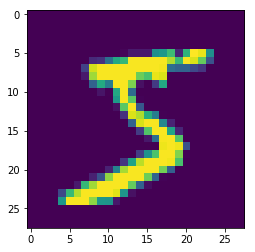

In [15]:
plt.imshow(image.reshape((28,28))) 
#viridis is the default colouring as it is is easy to visualize for colour blind people
#matplot lib has default colouring mechanism to the image passed in imshow() fn

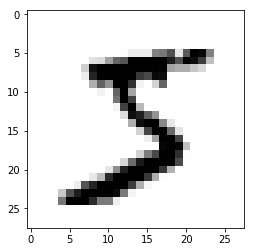

In [16]:
plt.imshow(image.reshape((28,28)), cmap='gist_yarg')  
#cmap='gist_yarg' for black and white image

In [17]:
#grab subset of 60000 training images and load it to model instead of loading all at once.
#batches are taken from randomly shuffled data
torch.manual_seed(101)

#shuffle true means shuffle batch_size after every epoch
train_loader = DataLoader(train_data,batch_size=100,shuffle=True)

test_loader = DataLoader(test_data,batch_size=500,shuffle=False)

In [18]:
train_loader

In [19]:
from torchvision.utils import make_grid
np.set_printoptions(formatter=dict(int=lambda x: f'{x:4}')) # to widen the printed array


In [20]:
#FIRST BATCH
for images,labels in train_loader:
    break #60,000/100 = 60 times

In [21]:
images

tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0.

In [22]:
images.shape
#o/p is read as followsL
# 100: no. of images
# 1: no. of colour channels
# 28: image width
# 28: image height

torch.Size([100, 1, 28, 28])

In [23]:
labels

tensor([0, 5, 7, 8, 6, 7, 9, 7, 1, 3, 8, 4, 4, 2, 2, 1, 3, 7, 1, 6, 3, 1, 0, 4,
        6, 4, 6, 9, 1, 1, 4, 0, 1, 4, 1, 8, 9, 3, 2, 1, 0, 9, 3, 1, 1, 3, 0, 2,
        1, 6, 7, 5, 5, 1, 3, 7, 4, 9, 2, 9, 9, 7, 0, 9, 8, 5, 2, 1, 8, 8, 6, 1,
        7, 3, 9, 4, 8, 5, 3, 0, 4, 4, 7, 9, 3, 4, 2, 8, 8, 5, 3, 5, 6, 8, 1, 2,
        7, 0, 6, 7])

Labels:  [   0    5    7    8    6    7    9    7    1    3    8    4]


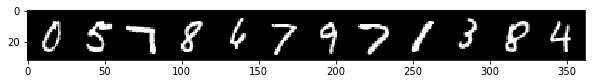

In [24]:
# Print the first 12 labels
print('Labels: ', labels[:12].numpy())

# Print the first 12 images
im = make_grid(images[:12], nrow=12)  # the default nrow is 8
plt.figure(figsize=(10,4))

# We need to transpose the images from CWH to WHC because plt.imshow() expects it to be in WHC format hence the conversion
# 
plt.imshow(np.transpose(im.numpy(), (1, 2, 0)));

In [25]:
#create multi layer perceptron model

class MultiLayerPerceptron(nn.Module):
    
    def __init__(self, in_sz=784,out_sz=10,layers=[120,84]):
        
        super().__init__()
        
        #fc is fully connected
        self.fc1 = nn.Linear(in_sz, layers[0])
        self.fc2 = nn.Linear(layers[0], layers[1])
        self.fc3 = nn.Linear(layers[1], out_sz)
        
    def forward(self,X):
        
        X = F.relu(self.fc1(X)) #pass to linear fn() and then result to relu activation fn
        X = F.relu(self.fc2(X)) #pass to linear fn() and then result to relu activation fn
        X = self.fc3(X)         #pass to linear fn()
        
        return F.log_softmax(X,dim=1) #its a different activation fn

In [26]:
torch.manual_seed(101)
model = MultiLayerPerceptron()
model

MultiLayerPerceptron(
  (fc1): Linear(in_features=784, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [27]:
#ANN ----> CNN
for param in model.parameters():
    print(param.numel()) # this shows how many connection do we have in each layer in ANN model

#105,214 total parameters that is huge number and these numbers will reduce when we use CNN model

94080
120
10080
84
840
10


In [28]:
criterion = nn.CrossEntropyLoss() #cross entropy loss is used for multi class classification problem
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [29]:
images.shape 

torch.Size([100, 1, 28, 28])

In [30]:
images.view(100,-1).shape# convert [100, 1, 28, 28] to [100,784]

torch.Size([100, 784])

In [31]:
#lets train and evaluate the model

In [32]:
import time
start_time = time.time()

#TRAINING
epochs = 10

#Trackers
train_losses  = []
test_losses   = []
train_correct = []
test_correct  = []

for i in range(epochs):
    
    trn_corr = 0
    tst_corr = 0
    
    for b, (X_train,y_train) in enumerate(train_loader):
        
        b+=1
        
        y_pred = model(X_train.view(100,-1))
        loss = criterion(y_pred,y_train)
        
        # Tally the number of correct predictions
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        trn_corr += batch_corr    
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if b%200 == 0:
            accuracy = trn_corr.item()*100/(100*b)
            print(f'Epoch: {i} Batch: {b} Loss: {loss.item()} accuracy: {accuracy}')
        
    train_losses.append(loss)
    train_correct.append(trn_corr)

    with torch.no_grad():
        
        for b,(X_test,y_test) in enumerate(test_loader):
            
            y_val = model(X_test.view(500,-1))
            
            predicted = torch.max(y_val.data, 1)[1]
            tst_corr += (predicted == y_test).sum()
    
    loss = criterion(y_val, y_test)
    test_losses.append(loss)
    test_correct.append(tst_corr)
    
    
curr_time = time.time()
total_time = curr_time - start_time
print(f'Duration: {total_time/60}minutes')


Epoch: 0 Batch: 200 Loss: 0.2805540859699249 accuracy: 83.04
Epoch: 0 Batch: 400 Loss: 0.2030348777770996 accuracy: 87.325
Epoch: 0 Batch: 600 Loss: 0.20227622985839844 accuracy: 89.32333333333334
Epoch: 1 Batch: 200 Loss: 0.1445707380771637 accuracy: 94.56
Epoch: 1 Batch: 400 Loss: 0.10489674657583237 accuracy: 95.11
Epoch: 1 Batch: 600 Loss: 0.12034717202186584 accuracy: 95.34666666666666
Epoch: 2 Batch: 200 Loss: 0.11627225577831268 accuracy: 96.53
Epoch: 2 Batch: 400 Loss: 0.08906283974647522 accuracy: 96.615
Epoch: 2 Batch: 600 Loss: 0.10235454887151718 accuracy: 96.74
Epoch: 3 Batch: 200 Loss: 0.0535891056060791 accuracy: 97.475
Epoch: 3 Batch: 400 Loss: 0.05533472076058388 accuracy: 97.485
Epoch: 3 Batch: 600 Loss: 0.05723270773887634 accuracy: 97.51
Epoch: 4 Batch: 200 Loss: 0.1291753500699997 accuracy: 97.96
Epoch: 4 Batch: 400 Loss: 0.09339293837547302 accuracy: 97.995
Epoch: 4 Batch: 600 Loss: 0.13001050055027008 accuracy: 98.03333333333333
Epoch: 5 Batch: 200 Loss: 0.045757

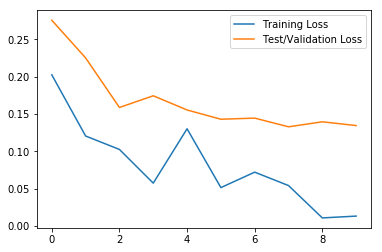

In [33]:
plt.plot(train_losses, label='Training Loss')
plt.plot(test_losses, label='Test/Validation Loss')
plt.legend()

In [34]:
train_correct[0]/600

tensor(89)

In [35]:
train_acc = [t/600 for t in train_correct]

In [36]:
train_acc

[tensor(89),
 tensor(95),
 tensor(96),
 tensor(97),
 tensor(98),
 tensor(98),
 tensor(98),
 tensor(98),
 tensor(99),
 tensor(99)]

In [37]:
test_acc = [t/100 for t in test_correct]

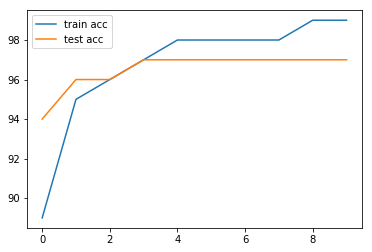

In [38]:
plt.plot(train_acc, label='train acc')
plt.plot(test_acc, label='test acc')
plt.legend()

In [39]:
# NEW UN SEEN DATA
test_load_all = DataLoader(test_data, batch_size=10000, shuffle=False)

In [40]:
with torch.no_grad():
    correct = 0
    
    for X_test,y_test in test_load_all:
        y_val = model(X_test.view(len(X_test),-1))
        predicted = torch.max(y_val,1)[1]
        correct += (predicted == y_test).sum()

In [41]:
100*correct.item()/len(test_data)

97.66

In [42]:
confusion_matrix(predicted.view(-1),y_test.view(-1))

array([[ 971,    0,    3,    0,    2,    3,    4,    1,    3,    2],
       [   0, 1120,    2,    0,    0,    0,    4,    2,    0,    2],
       [   1,    4, 1003,    1,    1,    0,    3,    6,    3,    0],
       [   3,    3,    9,  999,    1,   18,    1,    3,    8,   14],
       [   0,    0,    3,    0,  963,    3,    5,    2,    2,   12],
       [   0,    0,    0,    1,    0,  856,    3,    0,    2,    5],
       [   0,    2,    1,    0,    4,    6,  937,    0,    1,    0],
       [   0,    1,    6,    5,    3,    1,    0, 1010,    4,   10],
       [   3,    5,    5,    3,    2,    5,    1,    2,  949,    6],
       [   2,    0,    0,    1,    6,    0,    0,    2,    2,  958]],
      dtype=int64)

In [43]:
torch.save(model.state_dict(),'Models/myMNISTANNModel.pt')